<a href="https://colab.research.google.com/github/saikiranchetti/gitrepo/blob/master/Copy_of_cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import math

In [2]:
cricsheet_url='https://cricsheet.org/downloads/odis_male_csv2.zip'

In [3]:
cricsheet_url.split('/')[-1].split('.zip')[0]

'odis_male_csv2'

In [4]:
folder_name=cricsheet_url.split('/')[-1].split('.zip')[0]

In [5]:
zip_file=cricsheet_url.split('/')[-1]
zip_file

'odis_male_csv2.zip'

In [6]:
! wget -q "$cricsheet_url"

In [7]:
! wget -q https://cricsheet.org/downloads/odis_male_csv2.zip

In [8]:
! mkdir -p "$folder_name"

In [9]:
! unzip -o -qq "$zip_file" -d "$folder_name"

In [10]:
! rm "$zip_file"

In [11]:
cricsheet_readme=pd.read_csv(os.path.join(folder_name,'README.txt'),sep='\n',names=['matches'])
cricsheet_readme

,matches
0,All Men's One-day International match data in ...
1,==============================================...
2,The background
3,--------------
4,"As an experiment, after being asked by a user ..."
...,...
2097,-------------------
2098,You can find all of our currently available da...
2099,You can contact me via the following methods:
2100,Email : stephen@cricsheet.org


In [12]:
cdf=cricsheet_readme['matches'].str.split('-').apply(pd.Series,1)
cdf

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,All Men's One,day International match data in CSV format,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,==============================================...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The background,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"As an experiment, after being asked by a user ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,,,,,,,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098,You can find all of our currently available da...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099,You can contact me via the following methods:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,Email : stephen@cricsheet.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
cdf=cdf.iloc[:,:8].dropna()
cdf

,0,1,2,3,4,5,6,7
3,,,,,,,,
16,,,,,,,,
35,,,,,,,,
47,,,,,,,,
55,,,,,,,,
...,...,...,...,...,...,...,...,...
2092,2004,01,14,international,ODI,male,65645,Zimbabwe vs India
2093,2004,01,11,international,ODI,male,65644,Australia vs Zimbabwe
2094,2004,01,09,international,ODI,male,65643,Australia vs India
2095,2004,01,03,international,ODI,male,64857,Pakistan vs New Zealand


In [14]:
cricsheet_match_df=cdf.loc[cdf[0]!='']
cricsheet_match_df

,0,1,2,3,4,5,6,7
98,2022,04,16,international,ODI,male,1308249,Oman vs Papua New Guinea
99,2022,04,15,international,ODI,male,1308248,Oman vs Scotland
100,2022,04,13,international,ODI,male,1308247,Scotland vs Papua New Guinea
101,2022,04,12,international,ODI,male,1308246,Papua New Guinea vs Oman
102,2022,04,10,international,ODI,male,1308245,Scotland vs Oman
...,...,...,...,...,...,...,...,...
2091,2004,01,16,international,ODI,male,65646,Australia vs Zimbabwe
2092,2004,01,14,international,ODI,male,65645,Zimbabwe vs India
2093,2004,01,11,international,ODI,male,65644,Australia vs Zimbabwe
2094,2004,01,09,international,ODI,male,65643,Australia vs India


In [15]:
cricsheet_match_df.reset_index(drop=True,inplace=True)
cricsheet_match_df.columns=['year','month','day','int','format','gender','cricsheet_id','cricsheet_name']
cricsheet_match_df

,year,month,day,int,format,gender,cricsheet_id,cricsheet_name
0,2022,04,16,international,ODI,male,1308249,Oman vs Papua New Guinea
1,2022,04,15,international,ODI,male,1308248,Oman vs Scotland
2,2022,04,13,international,ODI,male,1308247,Scotland vs Papua New Guinea
3,2022,04,12,international,ODI,male,1308246,Papua New Guinea vs Oman
4,2022,04,10,international,ODI,male,1308245,Scotland vs Oman
...,...,...,...,...,...,...,...,...
1993,2004,01,16,international,ODI,male,65646,Australia vs Zimbabwe
1994,2004,01,14,international,ODI,male,65645,Zimbabwe vs India
1995,2004,01,11,international,ODI,male,65644,Australia vs Zimbabwe
1996,2004,01,09,international,ODI,male,65643,Australia vs India


In [16]:
cricsheet_match_df['date']=cricsheet_match_df.apply(lambda x:pd.to_datetime(x['year']+'-'+x['month']+'-'+x['day']),axis=1)
cricsheet_match_df.drop(columns=['year','month','day'],inplace=True)
cricsheet_match_df['cricsheet_id']=cricsheet_match_df['cricsheet_id'].astype('str')
cricsheet_match_df['date']=pd.to_datetime(cricsheet_match_df['date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [17]:
cricsheet_match_df

,int,format,gender,cricsheet_id,cricsheet_name,date
0,international,ODI,male,1308249,Oman vs Papua New Guinea,2022-04-16
1,international,ODI,male,1308248,Oman vs Scotland,2022-04-15
2,international,ODI,male,1308247,Scotland vs Papua New Guinea,2022-04-13
3,international,ODI,male,1308246,Papua New Guinea vs Oman,2022-04-12
4,international,ODI,male,1308245,Scotland vs Oman,2022-04-10
...,...,...,...,...,...,...
1993,international,ODI,male,65646,Australia vs Zimbabwe,2004-01-16
1994,international,ODI,male,65645,Zimbabwe vs India,2004-01-14
1995,international,ODI,male,65644,Australia vs Zimbabwe,2004-01-11
1996,international,ODI,male,65643,Australia vs India,2004-01-09


In [18]:
x=cricsheet_match_df['cricsheet_id']
x

0        1308249 
1        1308248 
2        1308247 
3        1308246 
4        1308245 
          ...    
1993       65646 
1994       65645 
1995       65644 
1996       65643 
1997       64857 
Name: cricsheet_id, Length: 1998, dtype: object

In [19]:

#pd.read_csv(os.path.join(folder_name,'1000887.csv'))


In [20]:
y=str(x[0])
print(x[0],type(x[0]))
y=y+'.csv'
print(y==' 1308249 .csv')
#df1=pd.DataFrame(pd.read_csv(os.path.join(folder_name,y)))
#df1

 1308249  <class 'str'>
True


In [21]:
print(len(x[0]))

9


In [22]:
odi_dataset=pd.DataFrame()
for i in range(len(x)):
  y=str(x[i])
  if int(y[1:len(y)-1])!=1051301:
    y=y[1:len(y)-1]+'.csv'
    #pd.read_csv(os.path.join(folder_name,y))
    df1=pd.DataFrame(pd.read_csv(os.path.join(folder_name,y)))
    odi_dataset = pd.concat([odi_dataset, df1], axis=0)
  else: 
    break
print(len(odi_dataset))
#pd.read_csv(os.path.join(folder_name,y))

316424


In [23]:
odi_dataset

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1308249,2022,2022-04-16,Dubai International Cricket Stadium,1,0.1,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,...,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1308249,2022,2022-04-16,Dubai International Cricket Stadium,1,0.2,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1308249,2022,2022-04-16,Dubai International Cricket Stadium,1,0.3,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1308249,2022,2022-04-16,Dubai International Cricket Stadium,1,0.4,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1308249,2022,2022-04-16,Dubai International Cricket Stadium,1,0.5,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,936137,2016/17,2016-10-02,New Wanderers Stadium,2,36.6,Australia,South Africa,CP Tremain,A Zampa,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,936137,2016/17,2016-10-02,New Wanderers Stadium,2,37.1,Australia,South Africa,A Zampa,CP Tremain,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
535,936137,2016/17,2016-10-02,New Wanderers Stadium,2,37.2,Australia,South Africa,A Zampa,CP Tremain,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536,936137,2016/17,2016-10-02,New Wanderers Stadium,2,37.3,Australia,South Africa,A Zampa,CP Tremain,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#odi_dataset.to_csv('ODI_dataset.csv')

In [25]:
#X = odi_dataset.iloc[:,[7,8,9,12,13]].values #Input features
#y = odi_dataset.iloc[:, 14].values #Label

In [26]:
#removing unwanted columns
column_delete=['season','player_dismissed','other_wicket_type','other_player_dismissed']
odi_dataset.drop(labels=column_delete,axis=1,inplace=True)
odi_dataset.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type
0,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.1,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,N Vanua,1,1,NaN,1.0,NaN,NaN,NaN,NaN
1,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.2,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,4,0,NaN,NaN,NaN,NaN,NaN,NaN
2,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.3,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.4,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,1,0,NaN,NaN,NaN,NaN,NaN,NaN
4,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.5,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,N Vanua,0,1,NaN,NaN,NaN,1.0,NaN,NaN


In [27]:
odi_dataset['wides'] = odi_dataset['wides'].fillna(0)
odi_dataset['noballs'] = odi_dataset['noballs'].fillna(0)
odi_dataset['byes'] = odi_dataset['byes'].fillna(0)
odi_dataset['legbyes'] = odi_dataset['legbyes'].fillna(0)
odi_dataset['penalty'] = odi_dataset['penalty'].fillna(0)
odi_dataset.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type
0,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.1,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,N Vanua,1,1,0.0,1.0,0.0,0.0,0.0,NaN
1,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.2,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,4,0,0.0,0.0,0.0,0.0,0.0,NaN
2,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.3,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,0,0,0.0,0.0,0.0,0.0,0.0,NaN
3,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.4,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,1,0,0.0,0.0,0.0,0.0,0.0,NaN
4,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.5,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,N Vanua,0,1,0.0,0.0,0.0,1.0,0.0,NaN


In [28]:
#odi_dataset


In [29]:
odi_dataset['Total_score']=0
odi_dataset['Final_score']=0

In [30]:
odi_dataset.head()

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,Total_score,Final_score
0,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.1,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,N Vanua,1,1,0.0,1.0,0.0,0.0,0.0,NaN,0,0
1,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.2,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,4,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0
2,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.3,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,0,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0
3,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.4,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,1,0,0.0,0.0,0.0,0.0,0.0,NaN,0,0
4,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.5,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,N Vanua,0,1,0.0,0.0,0.0,1.0,0.0,NaN,0,0


In [31]:
'''df1=pd.DataFrame(pd.read_csv(os.path.join(folder_name,'1308249.csv')))
column_delete=['season','player_dismissed','other_wicket_type','other_player_dismissed']
df1.drop(labels=column_delete,axis=1,inplace=True)
df1['wides'] = df1['wides'].fillna(0)
df1['noballs'] = df1['noballs'].fillna(0)
df1['byes'] = df1['byes'].fillna(0)
df1['legbyes'] = df1['legbyes'].fillna(0)
df1['penalty'] = df1['penalty'].fillna(0)
df1['total_score']=0
df1.head() '''

df1=odi_dataset
print(len(df1))

316424


In [32]:
#adding a new column called total_score to keep a track on the total runs scored by the team till tah point

runs_off_bat=list(df1.runs_off_bat)
extras=list(df1.extras)
Total_score=list(df1.Total_score)
ball=list(df1.ball)
for i in range(len(df1)):
   if ball[i]==0.1:
     Total_score[i]= runs_off_bat[i]+extras[i]
   
   else:
     Total_score[i]=Total_score[i-1]+runs_off_bat[i]+extras[i]
df1.Total_score=Total_score

# Adding final score column
Total_score=list(df1.Total_score)
ball=list(df1.ball)
#Final_score=list(df1.Final_score)
Final_score_list=[]
for i in range(len(df1)):
  try:
    if ball[i+1]<ball[i] and ball[i+1]==0.1:
      Final_score_list.append(Total_score[i])
  except:
     Final_score_list.append(Total_score[i])
kk=0
Final_score_temp=[0]*(len(df1))
for i in range(len(df1)):
  try:
    Final_score_temp[i]=Final_score_list[kk]
    if ball[i+1]==0.1:
      kk+=1
  except:
    Final_score_temp[i]=Final_score_list[kk]
df1.Final_score=Final_score_temp


#adding strikers and non-strikers score to the dataset
strikers=[]
ball=list(df1['ball'])
wickets=list(df1['wicket_type'])
st=list(df1['striker'])
nonst=list(df1['non_striker'])
runs=list(df1['runs_off_bat'])
sruns=[0 for i in range(len(df1))]
nonsruns=[0 for i in range(len(df1))]
for i in range(len(df1)):
  if ball[i]==0.1:
    s={}
    s[st[i]]=runs[i]
    s[nonst[i]]=0
  else:
    if (st[i] not in list(s.keys())) or (nonst[i] not in list(s.keys())):
      if nonst[i] not in list(s.keys()):
        s[nonst[i]]=0
      else:
        s[st[i]]=runs[i]
      b=[st[i],nonst[i]]
      v=list(s.keys())
      for j in range(len(b)):
        if v[j] not in b:
          del s[v[j]]
    else:
      s[st[i]]+=runs[i]
  llk=list(s.values())
  sruns[i]=s[st[i]]
  nonsruns[i]=s[nonst[i]]
df1['striker_runs']=sruns
df1['nonstriker_runs']=nonsruns

In [33]:
b=0
for i in range(len(df1)):
  if ball[i]==0.1:
    b+=1
print(b,len(Final_score_list))  

1169 1169


In [34]:
df1['wickets']=0
x=[]
for i in range(len(df1)):
  if df1.iloc[i]['wicket_type'] not in x:
    x.append(df1.iloc[i]['wicket_type'])
y=set(x)
y=list(y)
y=y[1:]
#print(y)

In [35]:
w=0
wicket_type=list(df1.wicket_type)
wickets=list(df1.wickets)
for i in range(len(df1)):
  if ball[i]==0.1:
    if wicket_type[i] in y:
      wickets[i]=1
      w=1
    else:
      w=0
  else:
    if wicket_type[i] in y:
      w+=1
      wickets[i]=w
    else:
      wickets[i]=wickets[i-1]
df1.wickets=wickets


In [36]:
df1['last_5_overs_score']=0
df1['next_5_overs_score']=0

#to add last 5 overs score to the dataseet
ball=list(df1.ball)
last_5_overs_score=list(df1.last_5_overs_score)
next_5_overs_score=list(df1.next_5_overs_score)
Total_score=list(df1.Total_score)
b=[]
y=4.1
for i in range(45):
  y=y+1
  b.append(y)
#print(b)
s=0
z=0
for i in range(len(last_5_overs_score)):
  if ball[i]==0.1:
    z=i
  if ball[i]<5.0:
    last_5_overs_score[i]=0
    continue
  if ball[i] in b:
    if ball[i]==5.1:
      last_5_overs_score[i]=df1.iloc[i-1]['Total_score']
      continue
    i=i
    v=ball.index(round(ball[i]-5)+0.1,z,len(last_5_overs_score)-1)
    last_5_overs_score[i]=df1.iloc[i-1]['Total_score']-df1.iloc[v]['Total_score']
  else:
    last_5_overs_score[i]=last_5_overs_score[i-1]
df1.last_5_overs_score=last_5_overs_score
df1.head(3)

,match_id,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,...,legbyes,penalty,wicket_type,Total_score,Final_score,striker_runs,nonstriker_runs,wickets,last_5_overs_score,next_5_overs_score
0,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.1,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,N Vanua,...,0.0,0.0,NaN,2,277,1,0,0,0,0
1,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.2,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,...,0.0,0.0,NaN,6,277,4,1,0,0,0
2,1308249,2022-04-16,Dubai International Cricket Stadium,1,0.3,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,N Vanua,...,0.0,0.0,NaN,6,277,4,1,0,0,0


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316424 entries, 0 to 537
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   match_id            316424 non-null  int64  
 1   start_date          316424 non-null  object 
 2   venue               316424 non-null  object 
 3   innings             316424 non-null  int64  
 4   ball                316424 non-null  float64
 5   batting_team        316424 non-null  object 
 6   bowling_team        316424 non-null  object 
 7   striker             316424 non-null  object 
 8   non_striker         316424 non-null  object 
 9   bowler              316424 non-null  object 
 10  runs_off_bat        316424 non-null  int64  
 11  extras              316424 non-null  int64  
 12  wides               316424 non-null  float64
 13  noballs             316424 non-null  float64
 14  byes                316424 non-null  float64
 15  legbyes             316424 non-null  

In [38]:
Teams=df1['batting_team'].unique()
Teams
matches_played_by_ind=[]
all_players=[]
india_players=[]
for i in range(len(df1)):
  all_players.append(df1.iloc[i]['striker'])
  if df1.iloc[i]['batting_team']=='India':
    matches_played_by_ind.append(df1.iloc[i]['match_id'])
    india_players.append(df1.iloc[i]['striker'])
P=set(all_players)
I=set(india_players)
M=set(matches_played_by_ind)
#matches_played_by_ind
print(P)

{'C Campher', 'DJ Willey', 'S Mahmood', 'C Carter', 'Sunzamul Islam', 'Sompal Kami', 'MD Shanaka', 'CR Ervine', 'Tamim Iqbal', 'LS Livingstone', 'V Kohli', 'KD Shah', 'NO Miller', 'Naseem Khushi', 'SD Hope', 'CBRLS Kumara', 'Fahad Nawaz', 'NA Rock', 'PRP Boissevain', 'Mohammed Siraj', 'DM Dupavillon', 'KM Jarvis', 'IG Holland', 'Fazle Mahmud', 'JP Duminy', 'Umar Amin', 'N Vanua', 'CK Holder', 'Shoriful Islam', 'T van der Gugten', 'R Murray', 'MC Henriques', 'Babar Azam', 'C Floyd', 'JN Loftie-Eaton', 'RE van der Merwe', 'Mashrafe Mortaza', 'Basil Hameed', 'DS Kulkarni', 'OF Smith', 'Mujeeb Ur Rahman', 'Samiullah Shenwari', 'Abul Hasan', 'LM Jongwe', 'Waqas Barkat', 'DT Tiripano', 'SR Thompson', 'K Rabada', 'Mosaddek Hossain', 'Mohammad Nabi', 'Ali Khan', 'KC Brathwaite', 'Afif Hossain', 'Mohammad Nawaz (3)', 'Badal Singh', 'Ahmed Shehzad', 'SP Krishnamurthi', 'BA King', 'K Phillip', 'Khurram Nawaz', 'TS Roland-Jones', 'Junaid Siddique (2)', 'Rameez Shahzad', 'Ibrahim Zadran', 'Naveen-u

In [39]:
mm=df1['ball'].unique()
nn=[]
for i in range(len(mm)):
  if mm[i]>49.5:
    nn.append(mm[i])
nn

[49.6, 49.7, 49.8, 49.9]

In [40]:
Runs_bat={}
for i in range(len(df1)):
  if df1.iloc[i]['striker'] not in list(Runs_bat.keys()):
    Runs_bat[df1.iloc[i]['striker']]=df1.iloc[i]['runs_off_bat']
  else:
    Runs_bat[df1.iloc[i]['striker']]+=df1.iloc[i]['runs_off_bat']
Runs_bat

{'A Balbirnie': 2082,
 'A Bohara': 13,
 'A Dananjaya': 291,
 'A Dutt': 30,
 'A Mishra': 15,
 'A Nao': 29,
 'A Neill': 6,
 'A Nortje': 19,
 'A Sharafu': 22,
 'A Vala': 1133,
 'A Zampa': 147,
 'AA Paradkar': 15,
 'AB de Villiers': 835,
 'AC Agar': 231,
 'AC Evans': 25,
 'AD Hales': 1045,
 'AD Mathews': 1343,
 'AD Russell': 49,
 'AF Milne': 38,
 'AG Cremer': 210,
 'AJ Finch': 2832,
 'AJ Hosein': 89,
 'AJ Turner': 192,
 'AJ Tye': 57,
 'AK Markram': 899,
 'AK Perera': 44,
 'AK Sah': 7,
 'AL Phehlukwayo': 737,
 'AM Fernando': 1,
 'AM McCarthy': 15,
 'AM Rahane': 869,
 'AP Devcich': 18,
 'AR McBrine': 421,
 'AR Nurse': 502,
 'AR Patel': 90,
 'AS Joseph': 249,
 'AT Carey': 1268,
 'AT Rayudu': 639,
 'AU Rashid': 364,
 'AV Lalcheta': 18,
 'Aamer Yamin': 32,
 'Aamir Kaleem': 18,
 'Aarif Sheikh': 284,
 'Aaron Jones': 394,
 'Aasif Sheikh': 214,
 'Abdul Shakoor': 10,
 'Abid Ali': 234,
 'Abu Hider': 1,
 'Abul Hasan': 7,
 'Adnan Mufti': 330,
 'Afif Hossain': 346,
 'Afsar Zazai': 22,
 'Aftab Alam': 55,

In [41]:
for i in range(2908):
  if round(df1.iloc[i]['ball'])==50:
    print('jj')

jj
jj
jj
jj
jj
jj
jj
jj
jj
jj


In [42]:
batsmen_information={}
mnmn=[]
ball=list(df1['ball'])
for i in range(len(df1)):
  if df1.iloc[i]['striker'] not in list(batsmen_information.keys()):
    batsmen_information[df1.iloc[i]['striker']]=[df1.iloc[i]['runs_off_bat'],1,[df1.iloc[i]['match_id']]]
  else:
    batsmen_information[df1.iloc[i]['striker']][0]+=df1.iloc[i]['runs_off_bat']
    batsmen_information[df1.iloc[i]['striker']][1]+=1
    if df1.iloc[i]['match_id'] not in batsmen_information[df1.iloc[i]['striker']][2]:
      batsmen_information[df1.iloc[i]['striker']][2].append(df1.iloc[i]['match_id'])
  if ball[i] in nn:
    batsmen_information[df1.iloc[i]['striker']][2].remove(df1.iloc[i]['match_id'])
batsmen_information

{'A Balbirnie': [2082,
  2712,
  [1277085,
   1272381,
   1272380,
   1272379,
   1251952,
   1251951,
   1251950,
   1251964,
   1251963,
   1251962,
   1244015,
   1244014,
   1244013,
   1244525,
   1244524,
   1198249,
   1198248,
   1198247,
   1203675,
   1203674,
   1203673,
   1168519,
   1168518,
   1168517,
   1168516,
   1168515,
   1168513,
   1168511,
   1168508,
   1161014,
   1168119,
   1168118,
   1168117,
   1168115,
   1150148,
   1150147,
   1150146,
   1133030,
   1133025,
   1133022,
   1133015,
   1133010,
   1133002,
   1131277,
   1131276,
   1131275,
   1131274,
   1125474,
   1125473,
   1125472,
   1033369,
   1033367,
   1033363,
   1029003,
   1029001,
   1040499,
   1040497,
   1040495,
   1040493,
   1080631,
   1080630]],
 'A Bohara': [13, 14, [1215124, 1215122]],
 'A Dananjaya': [291,
  421,
  [1271628,
   1262757,
   1193506,
   1144171,
   1144168,
   1140383,
   1140382,
   1140381,
   1153245,
   1142587,
   1142586,
   1142585,
   1142584,
   1130

In [43]:
no_of_innings=[]
nmnnnm=list(batsmen_information.keys())
for i in range(len(list(batsmen_information.keys()))):
  no_of_innings.append(len(batsmen_information[nmnnnm[i]][2]))


In [44]:
import numpy as np
x=df1['wicket_type'].unique()
y=np.delete(x,0)
x=np.delete(x,[0,3,7,9])
x

array(['caught', 'lbw', 'caught and bowled', 'bowled', 'stumped',
       'hit wicket'], dtype=object)

In [45]:
wickets_taken={}
balls_bowled={}
for i in range(len(df1)):
  if df1.iloc[i]['wicket_type'] in x:
    if df1.iloc[i]['bowler'] not in list(wickets_taken.keys()):
      wickets_taken[df1.iloc[i]['bowler']]=1
    else:
      wickets_taken[df1.iloc[i]['bowler']]+=1
wickets_taken
for i in range(len(df1)):
  if df1.iloc[i]['bowler'] not in list(balls_bowled.keys()):
    balls_bowled[df1.iloc[i]['bowler']]=1
  else:
    balls_bowled[df1.iloc[i]['bowler']]+=1
balls_bowled

{'A Bohara': 66,
 'A Dananjaya': 1967,
 'A Dutt': 138,
 'A Mishra': 271,
 'A Nao': 651,
 'A Ndlovu': 103,
 'A Neill': 225,
 'A Nortje': 625,
 'A Phillip': 36,
 'A Vala': 1327,
 'A Zampa': 2870,
 'AA Paradkar': 72,
 'AC Agar': 716,
 'AC Evans': 801,
 'AD Mathews': 297,
 'AD Russell': 177,
 'AF Milne': 352,
 'AG Cremer': 1663,
 'AJ Finch': 171,
 'AJ Hosein': 768,
 'AJ Turner': 86,
 'AJ Tye': 400,
 'AK Markram': 406,
 'AK Perera': 12,
 'AL Phehlukwayo': 2901,
 'AM Fernando': 123,
 'AM McCarthy': 12,
 'AM Phangiso': 28,
 'AP Devcich': 83,
 'AR McBrine': 2418,
 'AR Nurse': 2419,
 'AR Patel': 732,
 'AS Joseph': 2279,
 'AT Rayudu': 13,
 'AU Rashid': 3825,
 'AV Lalcheta': 84,
 'Aamer Yamin': 55,
 'Aamir Kaleem': 101,
 'Aarif Sheikh': 279,
 'Abu Hider': 109,
 'Abu Jayed': 113,
 'Abul Hasan': 24,
 'Afif Hossain': 61,
 'Aftab Alam': 726,
 'Ahmed Raza': 1864,
 'Aizaz Khan': 444,
 'Akif Raja': 97,
 'Al-Amin Hossain': 63,
 'Ali Khan': 31,
 'Amir Hamza': 490,
 'Amir Hayat': 468,
 'Amjad Javed': 136,


In [46]:
runs_conceded={}
for i in range(len(df1)):
  if df1.iloc[i]['bowler'] not in list(runs_conceded.keys()):
    runs_conceded[df1.iloc[i]['bowler']]=df1.iloc[i]['runs_off_bat']+df1.iloc[i]['extras']
  else:
    runs_conceded[df1.iloc[i]['bowler']]+=df1.iloc[i]['runs_off_bat']+df1.iloc[i]['extras']
runs_conceded

{'A Bohara': 51,
 'A Dananjaya': 1680,
 'A Dutt': 117,
 'A Mishra': 215,
 'A Nao': 527,
 'A Ndlovu': 82,
 'A Neill': 120,
 'A Nortje': 579,
 'A Phillip': 43,
 'A Vala': 855,
 'A Zampa': 2709,
 'AA Paradkar': 53,
 'AC Agar': 645,
 'AC Evans': 723,
 'AD Mathews': 225,
 'AD Russell': 163,
 'AF Milne': 331,
 'AG Cremer': 1214,
 'AJ Finch': 164,
 'AJ Hosein': 571,
 'AJ Turner': 60,
 'AJ Tye': 396,
 'AK Markram': 355,
 'AK Perera': 11,
 'AL Phehlukwayo': 2709,
 'AM Fernando': 139,
 'AM McCarthy': 10,
 'AM Phangiso': 17,
 'AP Devcich': 71,
 'AR McBrine': 1659,
 'AR Nurse': 2146,
 'AR Patel': 544,
 'AS Joseph': 2008,
 'AT Rayudu': 13,
 'AU Rashid': 3574,
 'AV Lalcheta': 62,
 'Aamer Yamin': 65,
 'Aamir Kaleem': 83,
 'Aarif Sheikh': 196,
 'Abu Hider': 94,
 'Abu Jayed': 121,
 'Abul Hasan': 25,
 'Afif Hossain': 46,
 'Aftab Alam': 595,
 'Ahmed Raza': 1287,
 'Aizaz Khan': 367,
 'Akif Raja': 79,
 'Al-Amin Hossain': 85,
 'Ali Khan': 23,
 'Amir Hamza': 344,
 'Amir Hayat': 392,
 'Amjad Javed': 93,
 'Ans

In [47]:
bowl_st={}
bvbv=list(wickets_taken.keys())
for i in range(len(bvbv)):
  bowl_st[bvbv[i]]=balls_bowled[bvbv[i]]/wickets_taken[bvbv[i]]
bowl_avg={}
for i in range(len(bvbv)):
  bowl_avg[bvbv[i]]=runs_conceded[bvbv[i]]/wickets_taken[bvbv[i]]
bowl_avg

{'A Dananjaya': 30.0,
 'A Dutt': 29.25,
 'A Mishra': 14.333333333333334,
 'A Nao': 32.9375,
 'A Ndlovu': 82.0,
 'A Neill': 17.142857142857142,
 'A Nortje': 26.318181818181817,
 'A Vala': 28.5,
 'A Zampa': 35.18181818181818,
 'AA Paradkar': 13.25,
 'AC Agar': 53.75,
 'AC Evans': 34.42857142857143,
 'AD Mathews': 25.0,
 'AD Russell': 27.166666666666668,
 'AF Milne': 33.1,
 'AG Cremer': 26.977777777777778,
 'AJ Finch': 82.0,
 'AJ Hosein': 25.954545454545453,
 'AJ Turner': 30.0,
 'AJ Tye': 33.0,
 'AK Markram': 39.44444444444444,
 'AL Phehlukwayo': 32.63855421686747,
 'AM Phangiso': 8.5,
 'AR McBrine': 27.65,
 'AR Nurse': 43.795918367346935,
 'AR Patel': 38.857142857142854,
 'AS Joseph': 28.685714285714287,
 'AU Rashid': 30.810344827586206,
 'AV Lalcheta': 31.0,
 'Aamer Yamin': 65.0,
 'Aamir Kaleem': 41.5,
 'Aarif Sheikh': 49.0,
 'Abu Hider': 31.333333333333332,
 'Abu Jayed': 24.2,
 'Afif Hossain': 15.333333333333334,
 'Aftab Alam': 23.8,
 'Ahmed Raza': 32.175,
 'Aizaz Khan': 40.77777777777

In [48]:
overs_bowled={}
for i in range(len(bvbv)):
  overs_bowled[bvbv[i]]=int(balls_bowled[bvbv[i]]/6)
#overs_bowled

In [49]:
player_information={}
players=list(batsmen_information.keys())
d=list(wickets_taken.keys())
for i in range(len(players)):
  player_information[players[i]]=[batsmen_information[players[i]][0],batsmen_information[players[i]][1],len(batsmen_information[players[i]][2])]
  if players[i] in d:
    player_information[players[i]].append(wickets_taken[players[i]])
  else:
    player_information[players[i]].append(0)
player_information

{'A Balbirnie': [2082, 2712, 61, 0],
 'A Bohara': [13, 14, 2, 0],
 'A Dananjaya': [291, 421, 27, 56],
 'A Dutt': [30, 70, 5, 4],
 'A Mishra': [15, 21, 2, 15],
 'A Nao': [29, 34, 9, 16],
 'A Neill': [6, 11, 3, 7],
 'A Nortje': [19, 28, 3, 22],
 'A Sharafu': [22, 25, 2, 0],
 'A Vala': [1133, 1685, 37, 30],
 'A Zampa': [147, 238, 21, 77],
 'AA Paradkar': [15, 16, 2, 4],
 'AB de Villiers': [835, 738, 21, 0],
 'AC Agar': [231, 263, 10, 12],
 'AC Evans': [25, 41, 6, 21],
 'AD Hales': [1045, 1091, 30, 0],
 'AD Mathews': [1343, 1753, 33, 9],
 'AD Russell': [49, 42, 4, 6],
 'AF Milne': [38, 35, 4, 10],
 'AG Cremer': [210, 397, 23, 45],
 'AJ Finch': [2832, 3332, 65, 2],
 'AJ Hosein': [89, 156, 10, 22],
 'AJ Turner': [192, 165, 7, 2],
 'AJ Tye': [57, 48, 5, 12],
 'AK Markram': [899, 1053, 35, 9],
 'AK Perera': [44, 62, 2, 0],
 'AK Sah': [7, 25, 2, 0],
 'AL Phehlukwayo': [737, 879, 38, 83],
 'AM Fernando': [1, 6, 2, 0],
 'AM McCarthy': [15, 41, 2, 0],
 'AM Rahane': [869, 1175, 22, 0],
 'AP Devcich

In [50]:
player_information['JJ Bumrah']
player_names=list(player_information.keys())
player_run=list(player_information.values())
player_runs=[]
aaa=[]
xxx=list(wickets_taken.keys())
for i in range(len(player_names)):
  if player_names[i] not in xxx:
    aaa.append(0)
  else:
    aaa.append(bowl_avg[player_names[i]])
eco=[]
for i in range(len(player_names)):
  if player_names[i] not in xxx:
    eco.append(0)
  else:
    eco.append(runs_conceded[player_names[i]]/overs_bowled[player_names[i]])
bst=[]
for i in range(len(player_names)):
  if player_names[i] not in xxx:
    bst.append(0)
  else:
    bst.append(bowl_st[player_names[i]])
for i in range(len(player_run)):
  player_runs.append(player_run[i][0])
player_innings=[]
for i in range(len(player_run)):
  player_innings.append(player_run[i][2])
#print(len(player_innings))
player_avg=[]
for i in range(len(player_run)):
  if player_innings[i]!=0:
    player_avg.append(player_runs[i]/player_innings[i])
  else:
    player_avg.append(player_runs[i])
player_st=[]
for i in range(len(player_run)):
  player_st.append((player_runs[i]/player_run[i][1])*100)
player_wickets=[]
for i in range(len(player_run)):
  player_wickets.append(player_run[i][3])
#print(len(player_run))
ppp={'player': player_names,'innings' :no_of_innings,'runs': player_runs,'average':player_avg,'strike rate':player_st,'wickets': player_wickets,'economy':eco,'bowling average':aaa,'bowling strikerate':bst}
#print(len(player_names),len(player_innings),len(player_runs),len(player_avg),len(player_wickets),len(player_st))
pi=pd.DataFrame(ppp)
pi

,player,innings,runs,average,strike rate,wickets,economy,bowling average,bowling strikerate
0,KH Prajapati,16,440,27.500000,72.249589,0,0.000000,0.000000,0.000000
1,Jatinder Singh,31,980,31.612903,76.923077,0,0.000000,0.000000,0.000000
2,Zeeshan Maqsood,29,758,26.137931,67.377778,37,4.127119,26.324324,38.405405
3,Ayan Khan,18,506,28.111111,64.955071,18,4.388350,25.111111,34.444444
4,Khawar Ali,24,575,23.958333,57.557558,35,4.691304,30.828571,39.457143
...,...,...,...,...,...,...,...,...,...
734,SM Boland,2,4,2.000000,57.142857,2,5.400000,54.000000,61.000000
735,JW Hastings,2,27,13.500000,122.727273,7,7.121212,33.571429,28.571429
736,Mosharraf Hossain,1,7,7.000000,35.000000,0,0.000000,0.000000,0.000000
737,D Ramdin,2,71,35.500000,71.000000,0,0.000000,0.000000,0.000000


In [51]:
batting_basra=[]
for i in range(len(pi)):
  batting_basra.append(format(pi.iloc[i]['average']+pi.iloc[i]['strike rate'],'.2f'))
bowling_basra=[]
for i in range(len(pi)):
  if pi.iloc[i]['wickets']==9:
    bowling_basra.append(0)
  else:
    bowling_basra.append(format(pi.iloc[i]['wickets']/pi.iloc[i]['innings'],'.2f'))
pi['batting basra']=batting_basra
pi['bowling basra']=bowling_basra
pi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in long_scalars
  if __name__ == '__main__':


,player,innings,runs,average,strike rate,wickets,economy,bowling average,bowling strikerate,batting basra,bowling basra
0,KH Prajapati,16,440,27.500000,72.249589,0,0.000000,0.000000,0.000000,99.75,0.00
1,Jatinder Singh,31,980,31.612903,76.923077,0,0.000000,0.000000,0.000000,108.54,0.00
2,Zeeshan Maqsood,29,758,26.137931,67.377778,37,4.127119,26.324324,38.405405,93.52,1.28
3,Ayan Khan,18,506,28.111111,64.955071,18,4.388350,25.111111,34.444444,93.07,1.00
4,Khawar Ali,24,575,23.958333,57.557558,35,4.691304,30.828571,39.457143,81.52,1.46
...,...,...,...,...,...,...,...,...,...,...,...
734,SM Boland,2,4,2.000000,57.142857,2,5.400000,54.000000,61.000000,59.14,1.00
735,JW Hastings,2,27,13.500000,122.727273,7,7.121212,33.571429,28.571429,136.23,3.50
736,Mosharraf Hossain,1,7,7.000000,35.000000,0,0.000000,0.000000,0.000000,42.00,0.00
737,D Ramdin,2,71,35.500000,71.000000,0,0.000000,0.000000,0.000000,106.50,0.00


In [52]:
'''
batting basra should be maximum where as bowling basra should be minimum
a player with higher basra indicates he is a better batsmen compared to the other 
where as while comparing bowlers a lower basra indicates that he is better when compared to the other
'''


'\nbatting basra should be maximum where as bowling basra should be minimum\na player with higher basra indicates he is a better batsmen compared to the other \nwhere as while comparing bowlers a lower basra indicates that he is better when compared to the other\n'

In [53]:
bnbn=pi['player']
anan=pi['runs']
players_to_analyze={}
for i in range(len(pi)):
  if anan[i]>1000:
    players_to_analyze[bnbn[i]]=anan[i]
players_to_analyze
print(len(list(players_to_analyze)))

75


In [54]:
nbn=list(pi['player'])
print(nbn)
print(nbn.index('V Kohli'))
pi.iloc[172]

['KH Prajapati', 'Jatinder Singh', 'Zeeshan Maqsood', 'Ayan Khan', 'Khawar Ali', 'Mohammad Nadeem', 'Naseem Khushi', 'Nestor Dhamba', 'Kaleemullah', 'Fayyaz Butt', 'L Siaka', 'A Vala', 'CJA Amini', 'H Hiri', 'TP Ura', 'S Bau', 'N Vanua', 'SK Atai', 'D Bau', 'CA Soper', 'SI Kamea', 'Sandeep Goud', 'KJ Coetzer', 'CM McBride', 'MH Cross', 'RD Berrington', 'HG Munsey', 'DE Budge', 'MA Leask', 'MRJ Watt', 'SM Sharif', 'A Neill', 'CS MacLeod', 'R Hekure', 'A Nao', 'Shoaib Khan', 'Hamza Tahir', 'Bilal Khan', 'MJ Guptill', 'HM Nicholls', 'WA Young', 'LRPL Taylor', 'MG Bracewell', 'C de Grandhomme', 'DAJ Bracewell', 'TWM Latham', 'IS Sodhi', 'KA Jamieson', 'SJ Myburgh', "MP O'Dowd", 'Vikramjit Singh', 'BFW de Leede', 'SA Edwards', 'MJG Rippon', 'PM Seelaar', 'LV van Beek', 'A Dutt', 'C Floyd', 'FJ Klaassen', 'TM Head', 'BR McDermott', 'AJ Finch', 'M Labuschagne', 'MP Stoinis', 'AT Carey', 'C Green', 'SA Abbott', 'JP Behrendorff', 'NT Ellis', 'A Zampa', 'Fakhar Zaman', 'Imam-ul-Haq', 'Babar Azam

player                  V Kohli
innings                      86
runs                       5099
average               59.290698
strike rate           95.954084
wickets                       0
economy                     0.0
bowling average             0.0
bowling strikerate          0.0
batting basra            155.24
bowling basra              0.00
Name: 172, dtype: object

In [55]:
x=set(matches_played_by_ind)
runs_vk=0
for i in range(len(df1)):
  if df1.iloc[i]['match_id'] in x:
    if df1.iloc[i]['striker']=='V Kohli':
      runs_vk+=df1.iloc[i]['runs_off_bat']
print(runs_vk)

5099


In [56]:
# Removing extra balls in an over (eg : balls such as 0.7 , 1.8 ,2.7 etc)

#df1 = df1[((df1.ball - df1['ball'].astype(int)) <= 0.6)]
#df1[:50]

In [57]:
df2=df1[["venue", "innings","ball","batting_team","bowling_team","striker","non_striker","striker_runs","nonstriker_runs",'bowler',"wickets","last_5_overs_score","Total_score","Final_score"]]
df2.head(5)



,venue,innings,ball,batting_team,bowling_team,striker,non_striker,striker_runs,nonstriker_runs,bowler,wickets,last_5_overs_score,Total_score,Final_score
0,Dubai International Cricket Stadium,1,0.1,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,1,0,N Vanua,0,0,2,277
1,Dubai International Cricket Stadium,1,0.2,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,4,1,N Vanua,0,0,6,277
2,Dubai International Cricket Stadium,1,0.3,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,4,1,N Vanua,0,0,6,277
3,Dubai International Cricket Stadium,1,0.4,Oman,Papua New Guinea,Jatinder Singh,KH Prajapati,5,1,N Vanua,0,0,7,277
4,Dubai International Cricket Stadium,1,0.5,Oman,Papua New Guinea,KH Prajapati,Jatinder Singh,1,5,N Vanua,0,0,8,277


In [58]:
from sklearn import preprocessing
def labelEncoding(data):
    dataset = pd.DataFrame(df2)
    feature_dict ={}
      
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
              
    return dataset
  
labelEncoding(df2)
df2.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,striker_runs,nonstriker_runs,bowler,wickets,last_5_overs_score,Total_score,Final_score
0,31,1,0.1,11,13,338,313,1,0,359,0,0,2,277
1,31,1,0.2,11,13,314,336,4,1,359,0,0,6,277
2,31,1,0.3,11,13,314,336,4,1,359,0,0,6,277
3,31,1,0.4,11,13,314,336,5,1,359,0,0,7,277
4,31,1,0.5,11,13,338,313,1,5,359,0,0,8,277


In [59]:

import pandas as pd
X = df2.iloc[:,:12].values #Input features
y = df2.iloc[:,13].values #Label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Linear Regression
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value: linear regression" , score)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
lin = RandomForestRegressor(n_estimators=100,max_features=None)
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
score = lin.score(X_test,y_test)*100
print("R-squared value: random forest" , score)

R-squared value: linear regression 34.30166664328021
R-squared value: random forest 98.68715248315225


In [66]:
###Team Wise Statistics
odi_matches_url_2016 = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2016;type=year"
odi_matches_url_2017 = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2017;type=year"
odi_matches_url_2018 = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2018;type=year"
odi_matches_url_2019 = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2019;type=year"
odi_matches_url_2020 = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2020;type=year"
odi_matches_url_2021 = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2021;type=year"
odi_matches_url_2022 = "https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=2;id=2022;type=year"
df_2016= pd.read_html(odi_matches_url_2016,match="Match results")[0]
df_2017= pd.read_html(odi_matches_url_2017,match="Match results")[0]
df_2018= pd.read_html(odi_matches_url_2018,match="Match results")[0]
df_2019= pd.read_html(odi_matches_url_2019,match="Match results")[0]
df_2020= pd.read_html(odi_matches_url_2020,match="Match results")[0]
df_2021= pd.read_html(odi_matches_url_2021,match="Match results")[0]
df_2022= pd.read_html(odi_matches_url_2022,match="Match results")[0]
frames = [df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022]

odi_matches_df= pd.concat(frames)
odi_matches_df.head()
#print(len(odi_matches_df))

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Sri Lanka,no result,NaN,Nelson,"Jan 2, 2016",ODI # 3718
1,Afghanistan,Zimbabwe,Zimbabwe,117 runs,Sharjah,"Jan 2, 2016",ODI # 3719
2,Afghanistan,Zimbabwe,Zimbabwe,65 runs,Sharjah,"Jan 4, 2016",ODI # 3720
3,New Zealand,Sri Lanka,New Zealand,36 runs,Mount Maunganui,"Jan 5, 2016",ODI # 3721
4,Afghanistan,Zimbabwe,Afghanistan,2 wickets,Sharjah,"Jan 6, 2016",ODI # 3722


In [70]:
odi_matches_df.isnull().sum()
#Lets delete rows which have no results as analysis of it is unnecessary
odi_matches_df = odi_matches_df[odi_matches_df.Margin.str.contains("result") == False]
old_df = odi_matches_df.Winner.value_counts()
#old_df

In [71]:
#Now Lets find a way to see how many matches have each team played. We have two columns with different team names so we will have to conduct proper EDA
group1=odi_matches_df.groupby("Team 1").size().rename("Team 1")
group2=odi_matches_df.groupby("Team 2").size().rename("Team 2")
total_df=pd.concat([group1,group2],axis=1).fillna(0)
total_df["total"]=total_df["Team 1"]+total_df["Team 2"]
total_df.columns
##This gives us the total matches played by each team.Lets draw a seaborn visualisation 

Index(['Team 1', 'Team 2', 'total'], dtype='object')

In [79]:
#!pip install matplotlib seaborn --upgrade --quiet
#python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'ODI Matches Played by team')

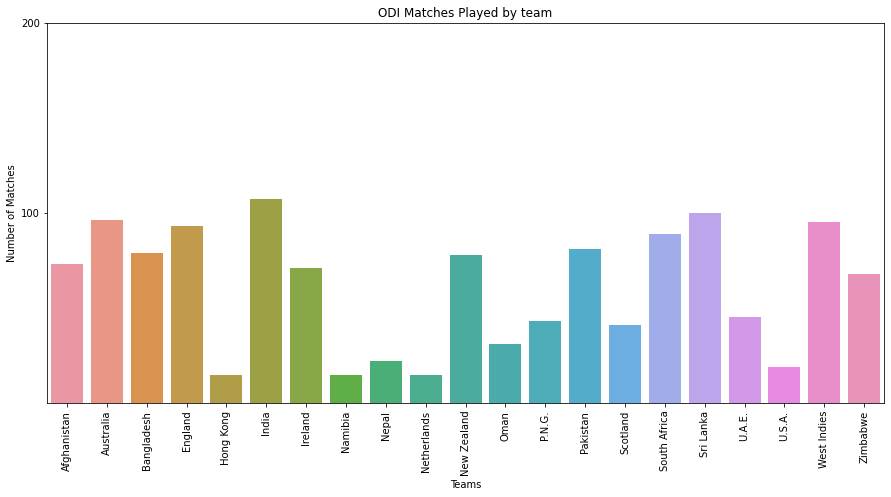

In [82]:
%matplotlib inline
plt.figure(figsize=(15, 7))
sns.barplot(x=total_df.index,y=total_df["total"])
plt.ylabel("Number of Matches")
plt.xlabel("Teams")
plt.yticks([100,200])
plt.xticks(rotation=90)
plt.title("ODI Matches Played by team")

In [83]:
total_df

,Team 1,Team 2,total
Afghanistan,47,26,73
Australia,43,53,96
Bangladesh,45,34,79
England,54,39,93
Hong Kong,11,4,15
India,51,56,107
Ireland,32,39,71
Namibia,10,5,15
Nepal,13,9,22
Netherlands,9,6,15


In [84]:
sort_df = total_df.sort_values('total', ascending = False).head(16)
sort_df

,Team 1,Team 2,total
India,51,56,107
Sri Lanka,46,54,100
Australia,43,53,96
West Indies,40,55,95
England,54,39,93
South Africa,54,35,89
Pakistan,19,62,81
Bangladesh,45,34,79
New Zealand,55,23,78
Afghanistan,47,26,73


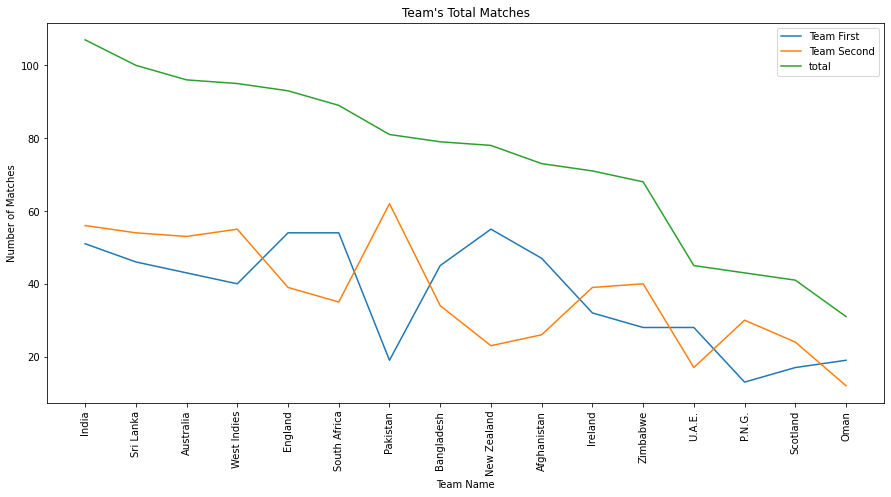

In [85]:
plt.figure(figsize=(15,7))
plt.plot(sort_df)
plt.xticks(rotation=90)

plt.xlabel('Team Name')
plt.ylabel('Number of Matches')
plt.title("Team's Total Matches")
plt.legend(['Team First', 'Team Second', 'total'])

Text(0, 0.5, 'Number of Matches')

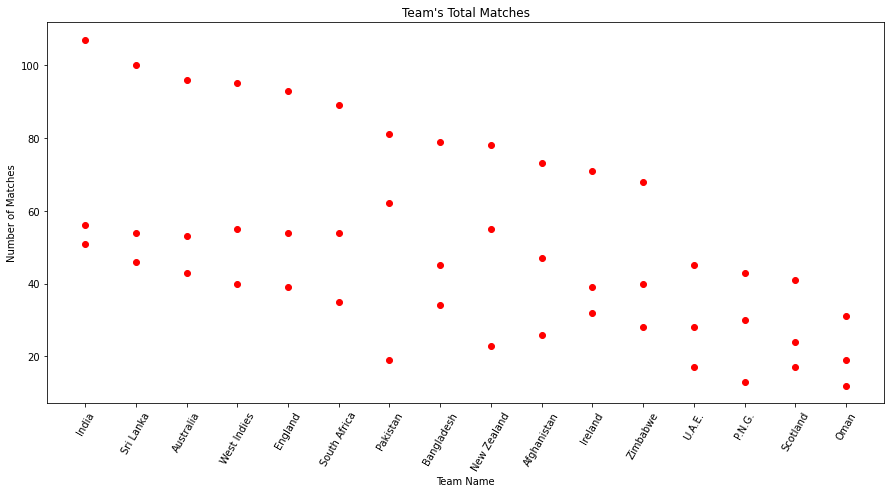

In [86]:
plt.figure(figsize=(15, 7))
plt.xticks(rotation=60)

plt.plot(sort_df, 'or')
plt.title("Team's Total Matches");

plt.xlabel('Team Name')
plt.ylabel('Number of Matches')

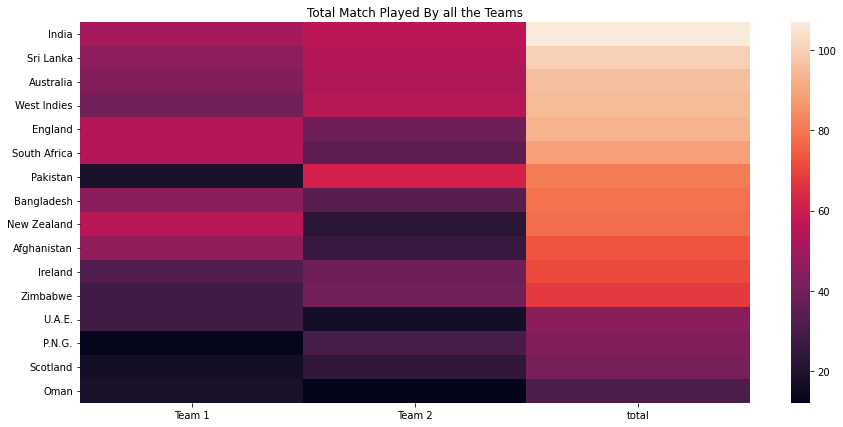

In [87]:
plt.figure(figsize=(15, 7))
plt.title("Total Match Played By all the Teams")
sns.heatmap(sort_df);

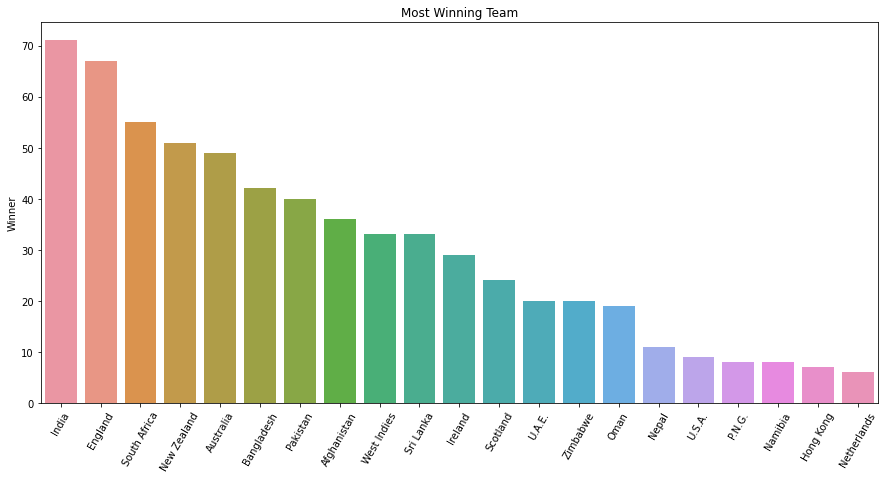

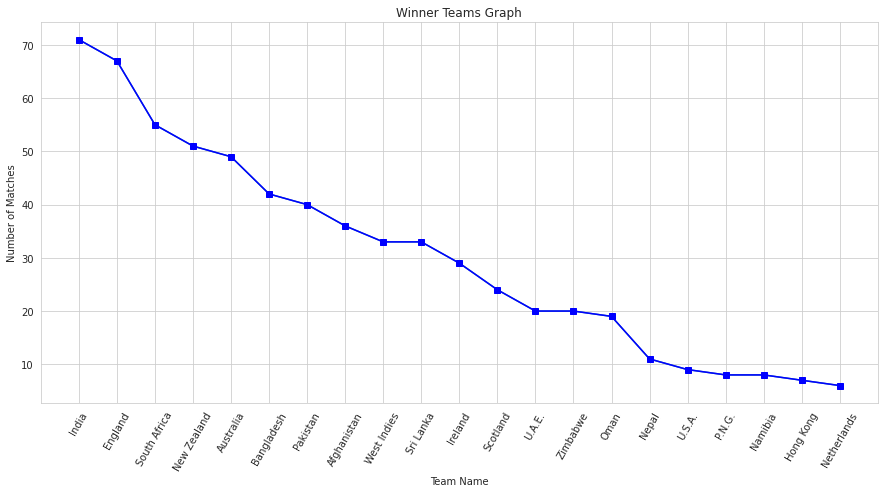

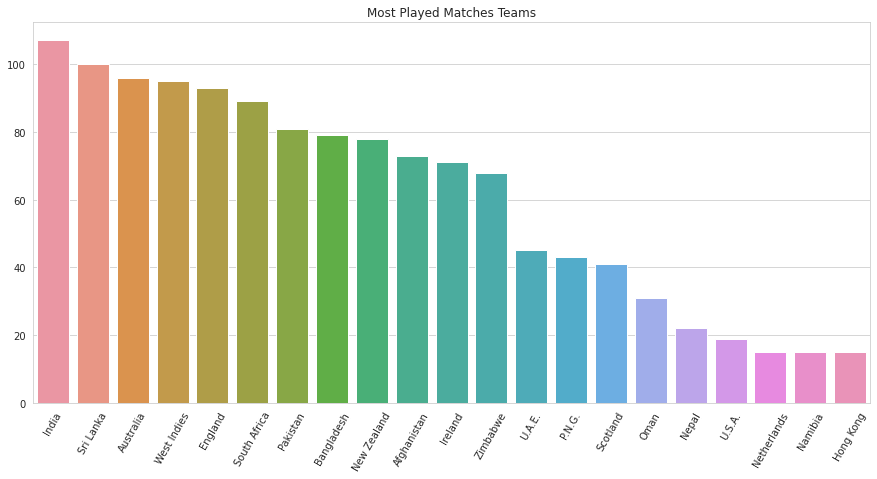

In [92]:
main1_df = odi_matches_df.groupby("Team 1").size()
sort2_df = main1_df.sort_values(ascending = False)
main2_df = odi_matches_df.groupby("Team 2").size()
sort3_df = main2_df.sort_values(ascending = False)
overall_df = sort2_df + sort3_df
overall2_df = overall_df.sort_values(ascending = False)
Looser2_df = overall2_df - old_df
Looser_df = Looser2_df.sort_values(ascending = False)
#Which Team won the most matches?
Winner_df =  odi_matches_df.Winner.value_counts()
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.title("Most Winning Team")
sns.barplot(x=Winner_df.index,y=Winner_df);
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
plt.plot(Winner_df)
plt.xticks(rotation=60)

plt.xlabel('Team Name')
plt.ylabel('Number of Matches')
plt.title("Winner Teams Graph")
plt.plot(Winner_df, 's-b')
# Which Team Played the Most Matches?
overall_df = sort2_df + sort3_df
overall2_df = overall_df.sort_values(ascending = False)
complete_df = overall2_df.head(23)
plt.figure(figsize=(15,7))
plt.xticks(rotation=60)
plt.title("Most Played Matches Teams")
sns.barplot(x=complete_df.index,y=complete_df);

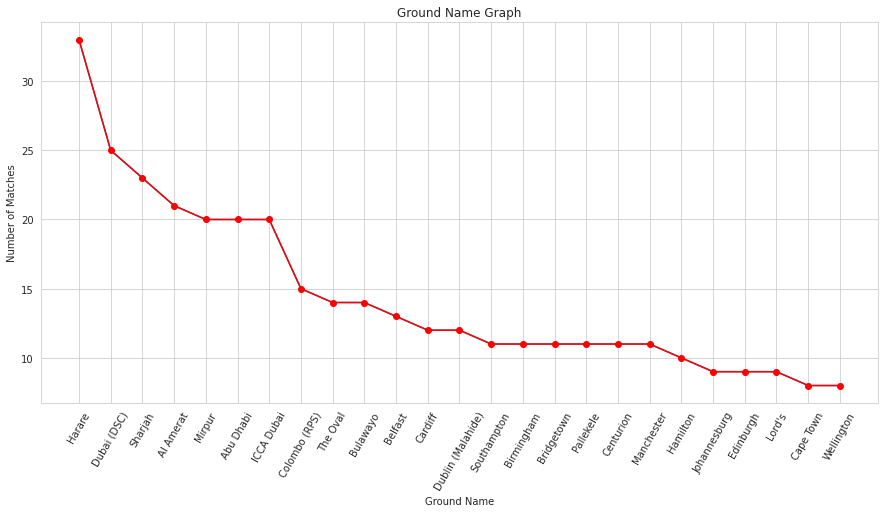

In [94]:
#Which cricket ground is used to play the cricket matches most of time
ground_df = odi_matches_df.Ground.value_counts()
Ground_df = ground_df.head(25)
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
plt.plot(Ground_df)
plt.xticks(rotation=60)

plt.xlabel('Ground Name')
plt.ylabel('Number of Matches')
plt.title("Ground Name Graph")
plt.plot(Ground_df, 'o-r')

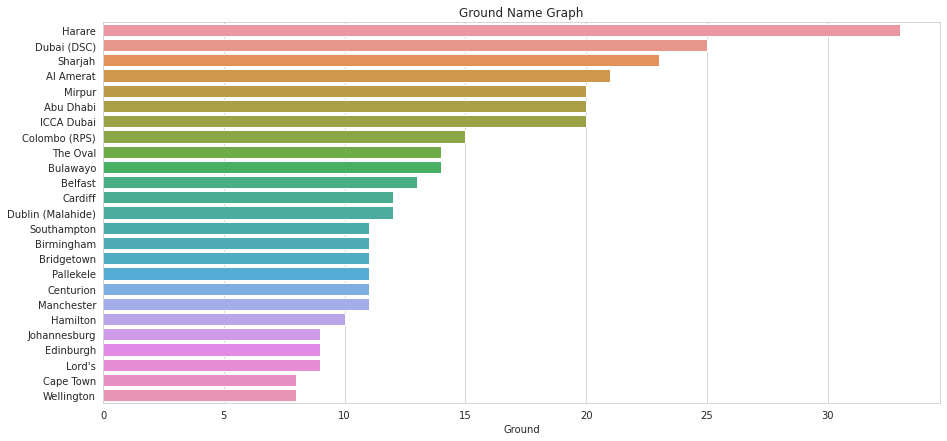

In [95]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.title("Ground Name Graph")
sns.barplot(x=Ground_df,y=Ground_df.index);